In [12]:
#1.4.7
import cv2
import numpy as np
from matplotlib import pyplot as plt

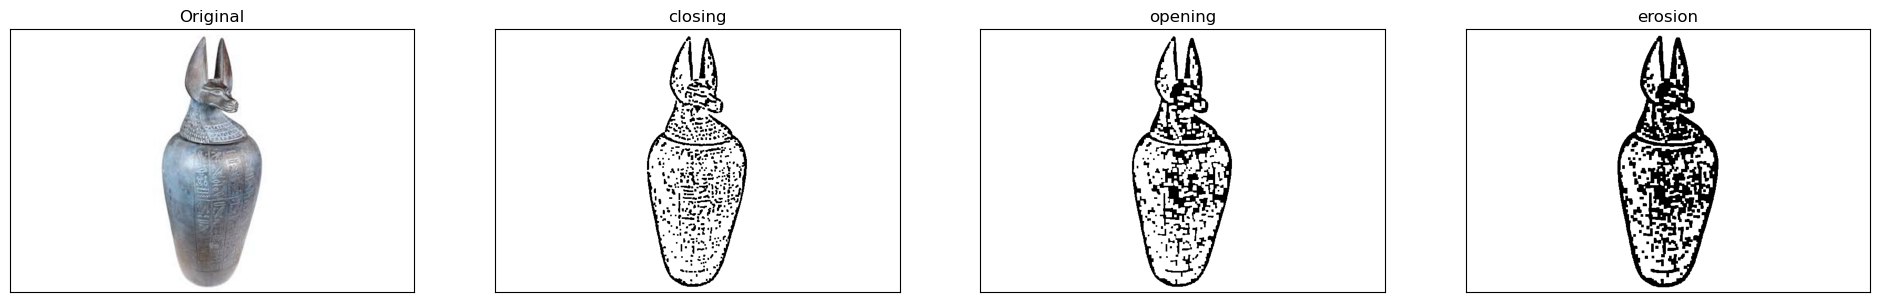

In [43]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)

ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel3)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel3)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel5)
erosion = cv2.erode(opening,kernel3,iterations = 1)


plt.figure(figsize=(24,8))
plt.subplot(1,4,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(erosion,cmap = 'gray')
plt.title('erosion'), plt.xticks([]), plt.yticks([])
plt.show()

In [44]:
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

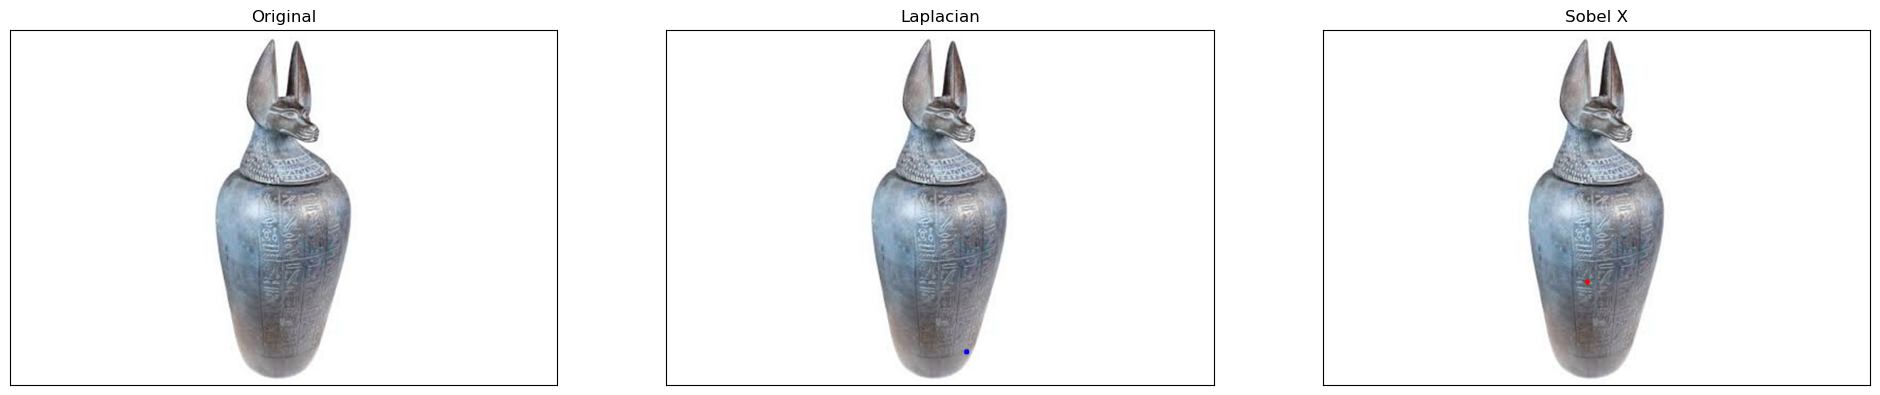

In [48]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)


size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))


cnt = contours[9]

{'m00': 4.0, 'm10': 1688.0, 'm01': 1812.0, 'm20': 712337.3333333333, 'm11': 764664.0, 'm02': 820837.3333333333, 'm30': 300607480.0, 'm21': 322688812.0, 'm12': 346393354.6666667, 'm03': 371840520.0, 'mu20': 1.3333333332557231, 'mu11': 0.0, 'mu02': 1.3333333332557231, 'mu30': 1.1920928955078125e-07, 'mu21': 3.5157427191734314e-08, 'mu12': 5.2619725465774536e-08, 'mu03': 1.1920928955078125e-07, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 3.725290298461914e-09, 'nu21': 1.0986695997416973e-09, 'nu12': 1.6443664208054543e-09, 'nu03': 3.725290298461914e-09}


In [47]:
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(approx)
x,y,w,h = cv2.boundingRect(cnt)
rect = cv2.minAreaRect(cnt)
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

TypeError: Invalid shape () for image data

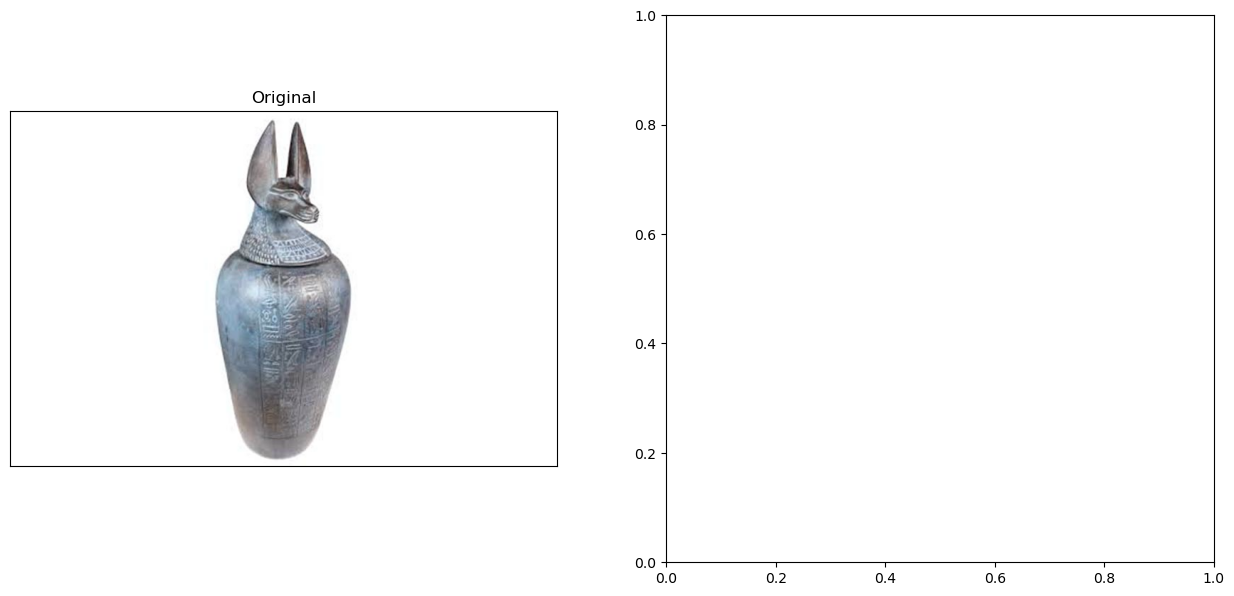

In [50]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(epsilon,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(approx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()